In [10]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv('AirPassengers.csv', index_col=['Month'], parse_dates=['Month'] )

In [12]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


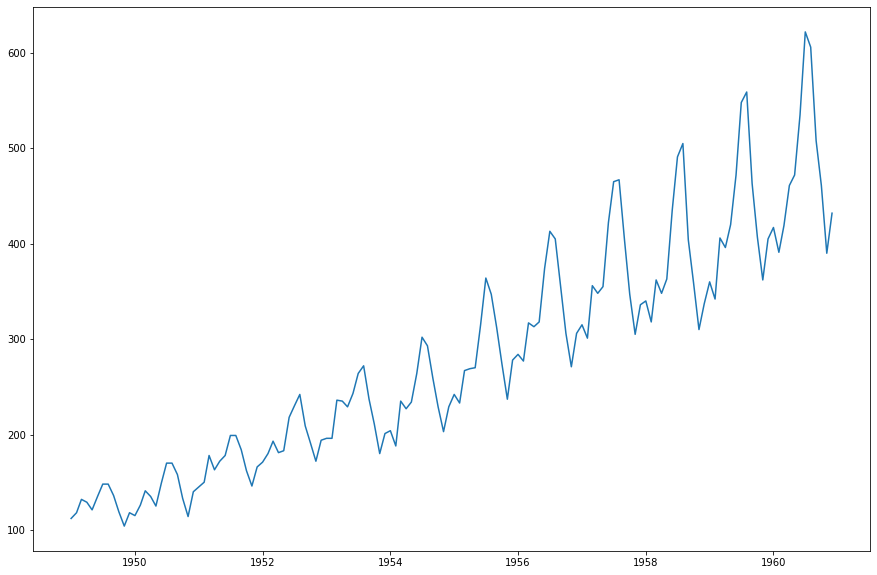

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(data)
plt.show()


In [14]:
# !pip install statsmodels

### Visualising the Passenger spread in Quaterly, Monthly and Yearly 

In [15]:

data.columns = ['Passengers']

[]

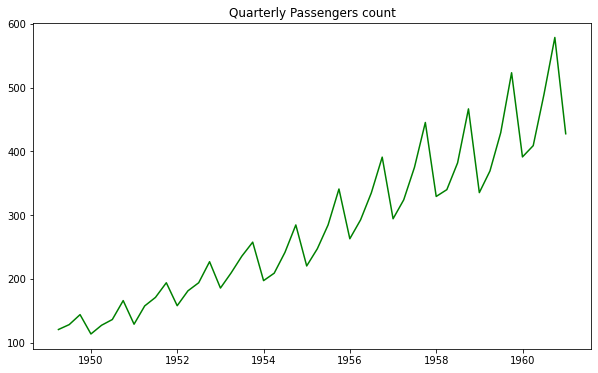

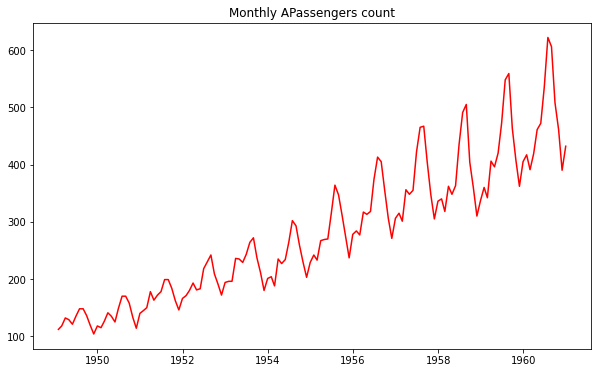

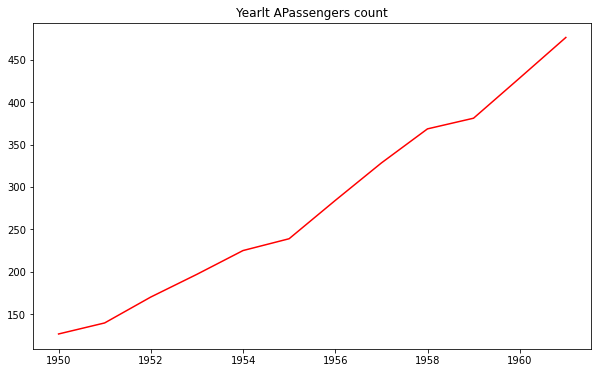

In [16]:
qt = data.Passengers.resample('Q').mean()

plt.figure(figsize=(10, 6))
plt.plot(qt,color='g')
plt.title('Quarterly Passengers count')
#plt.legend()
plt.plot()

mt = data.Passengers.resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(mt,color='r')
plt.title('Monthly APassengers count')
#plt.legend()
plt.plot()

mt = data.Passengers.resample('Y').mean()

plt.figure(figsize=(10, 6))
plt.plot(mt,color='r')
plt.title('Yearlt APassengers count')
#plt.legend()
plt.plot()


### Determine if the process is AR or not using the ACF and PACF plots 

In [17]:
import statsmodels.api as sm

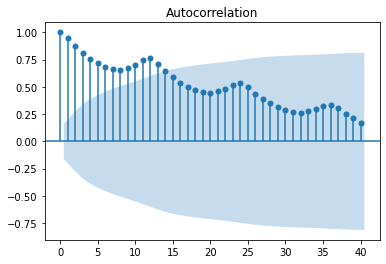

<Figure size 1080x720 with 0 Axes>

In [18]:
sm.graphics.tsa.plot_acf(data.Passengers.squeeze(), lags=40)
plt.figure(figsize=(15,10))
plt.show()

## Dickey fuller test 


We need to make the time series stationary to apply Statistical Forecasting Methods

The series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean

constant variance

an autocovariance that does not depend on time.
Dickey-Fuller Test

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [20]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [21]:
#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### The Results shows Critical value 5% is less than Test Statistics and P value is  0.81 > 0.05 so the Time Series here is not stationary 

In [41]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Split data 

In [25]:
test = data['1957-12-01' : '1960-12-01']

In [26]:
train  = data['1949-01-01': '1956-12-01']

In [27]:
train

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-08-01,405
1956-09-01,355
1956-10-01,306


In [28]:
# np.log(data).plot()

In [29]:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [30]:
import statsmodels.tsa.api as smt
def tsplot(y, lags=None, figsize=(12, 10), style='bmh'):
    
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

/home/arun/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


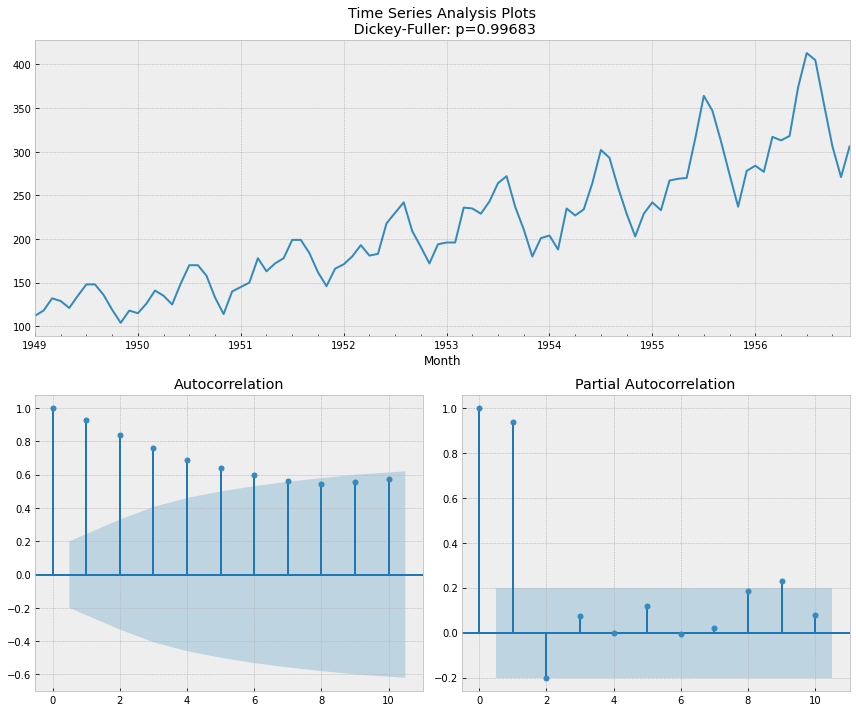

In [31]:


tsplot(train['Passengers'], lags=10)



process is AR

In [34]:
df_train = train['Passengers']

/home/arun/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


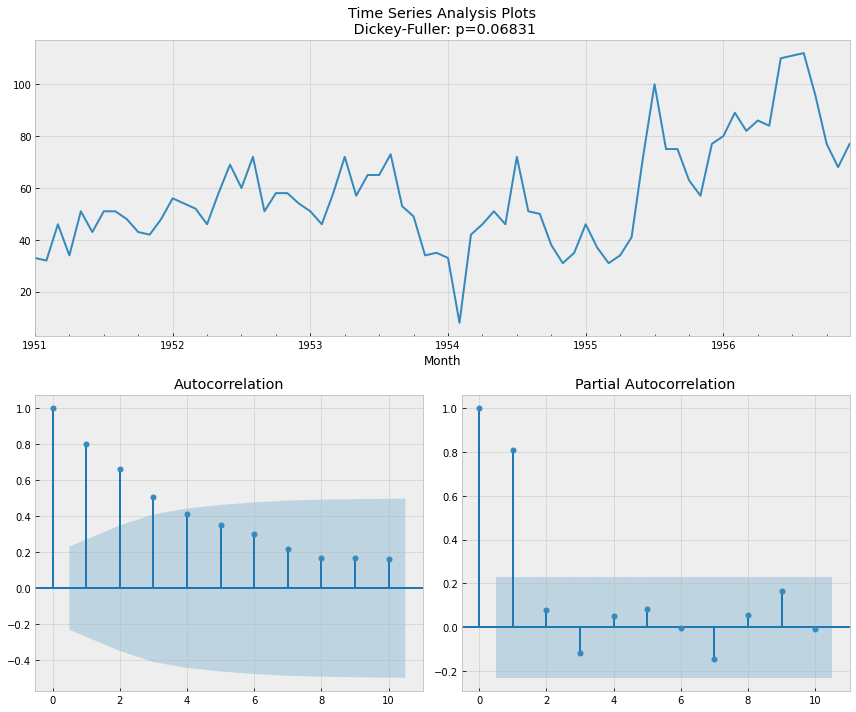

In [35]:
tsw_diff = df_train - df_train.shift(24)
tsplot(tsw_diff[24:], lags=10)

ACF plot:  a bar chart of the coefficients of correlation between a time series and lags of itself. 
The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.

/home/arun/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


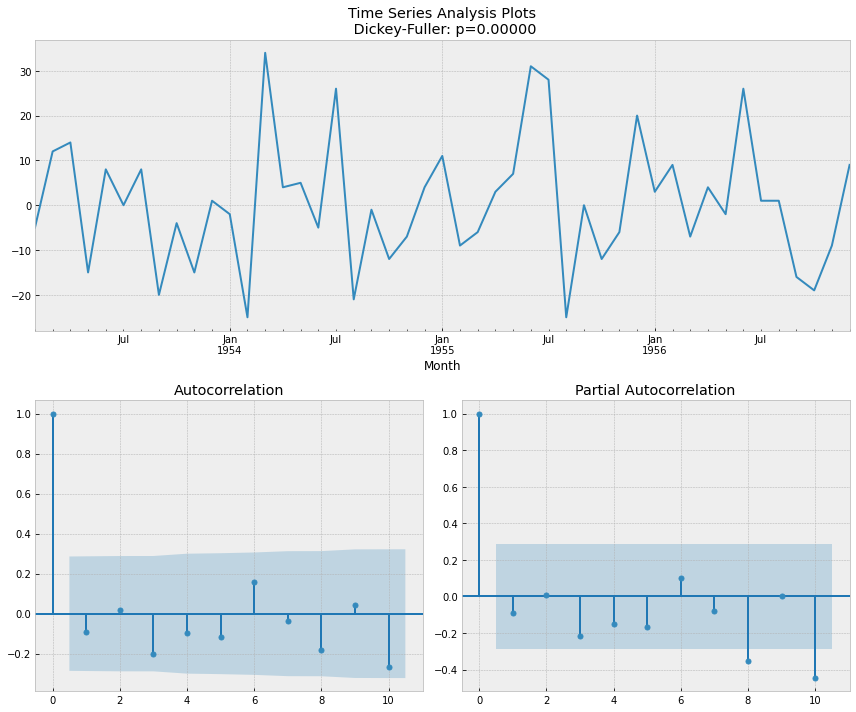

In [36]:
tsw_diff = tsw_diff.dropna()
tsw_diff = tsw_diff - tsw_diff.shift(1)
tsplot(tsw_diff[24+1:], lags=10)



In [42]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

from statsmodels.tsa.arima.model import ARIMA

### AR MODEL  (13,0,0)

In [87]:
def train(df, ar, ma):
    model = ARIMA(df_train, order=(ar,0, ma))
    model_fit = model.fit()
    print(model_fit.summary())
    
    # line plot of residuals
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()
    
    # density plot of residuals
    residuals.plot(kind='kde')
    plt.show()
    # summary stats of residuals
    print(residuals.describe())

/home/arun/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/arun/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/arun/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/arun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   96
Model:                ARIMA(13, 0, 0)   Log Likelihood                -363.665
Date:                Sat, 31 Jul 2021   AIC                            757.331
Time:                        11:33:03   BIC                            795.796
Sample:                    01-01-1949   HQIC                           772.879
                         - 12-01-1956                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        213.7122     61.260      3.489      0.000      93.644     333.780
ar.L1          1.0015      0.076     13.122      0.000       0.852       1.151
ar.L2         -0.0894      0.122     -0.732      0.4

/home/arun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


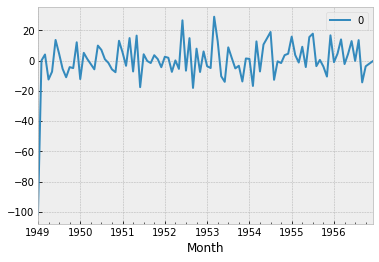

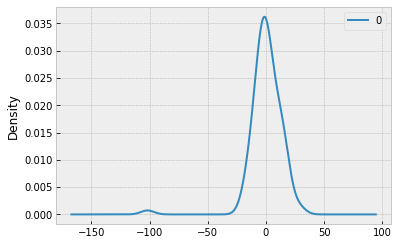

                0
count   96.000000
mean     0.259848
std     14.314833
min   -101.712186
25%     -5.197799
50%     -0.039596
75%      7.312406
max     29.045089


In [88]:
train(df_train, 13, 0)

In [89]:
results

### ploting results 

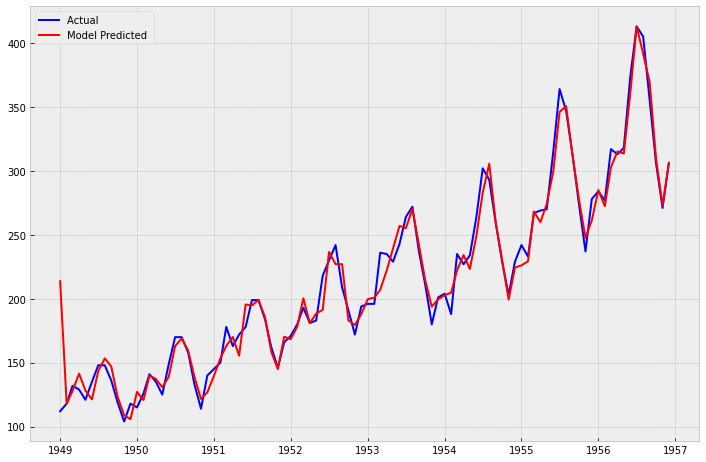

In [90]:

def plot(results):
    plt.figure(figsize=(12, 8))
    plt.style.use('bmh')
    plt.plot(df_train, label= 'Actual ', color = 'blue')
    plt.plot(results.fittedvalues, color='red', label= 'Model Predicted ')
    plt.legend()


plot(results)
# plt.savefig("Arima_model.png")



### AR Model - Score MAPE 

In [92]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [93]:
y_true = test["Passengers"]
y_pred = results.predict(start=test.index[0], end=test.index[-1])

In [94]:
error = mean_absolute_percentage_error(y_true, y_pred)

In [96]:
print("MAPE Score is ", error)

MAPE Score is  27.374375038290193


### AR MODEL - Predict next 50 steps 

In [106]:
type(results.fittedvalues)

pandas.core.series.Series

In [120]:
results.fittedvalues.shape


(96,)

In [132]:
# test.shape[0]+50

In [133]:
# forecast.dropna()

<ipython-input-131-3e7a856a7e28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Arima_Forecasted_Values']= np.NaN


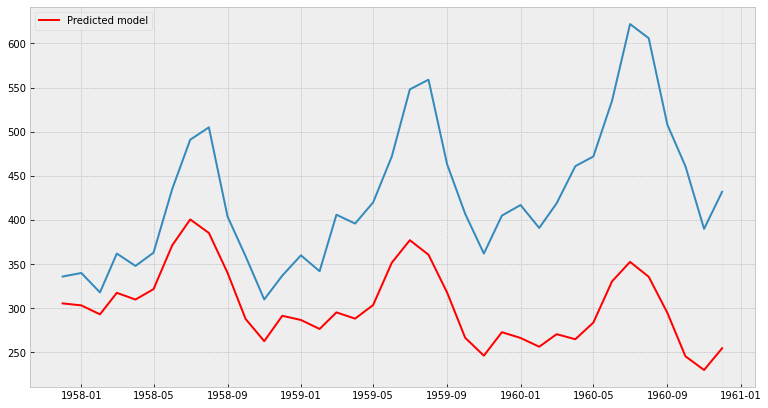

In [131]:
test['Arima_Forecasted_Values']= np.NaN

forecast = results.predict(start = test.index[0], end = test.index[-1])
forecast = test.Arima_Forecasted_Values.append(forecast)
# forecast = forecast.dropna()
plt.figure(figsize=(13, 7))
#plt.title("Mean Absolute Percentage Error: is ")
plt.plot(forecast, color='r', label="Predicted model")
plt.axvspan(test.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(test)
plt.legend()
plt.savefig("Forecasted_ARIMA_model.png")

plt.grid(True);

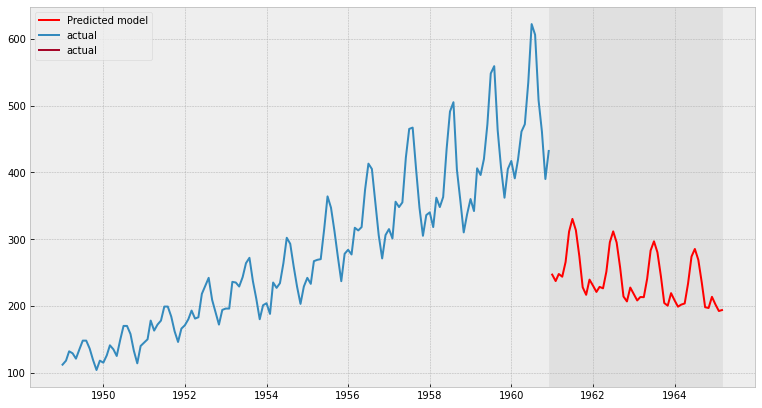

In [146]:
data1['Arima_Forecasted_Values']= np.NaN

forecast = results.predict(start = data1.shape[0], end = data1.shape[0]+50)
forecast = data1.Arima_Forecasted_Values.append(forecast)

plt.figure(figsize=(13, 7))
#plt.title("Mean Absolute Percentage Error: is ")
plt.plot(forecast, color='r', label="Predicted model")
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(data, label="actual")
plt.legend()
# plt.savefig("Forecasted_ARIMA_model.png")

plt.grid(True);

### MA MODEL (0,0,13)

/home/arun/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/arun/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/arun/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/arun/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/arun/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWar

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                   96
Model:                ARIMA(0, 0, 13)   Log Likelihood                -415.767
Date:                Sat, 31 Jul 2021   AIC                            861.534
Time:                        11:58:06   BIC                            899.999
Sample:                    01-01-1949   HQIC                           877.082
                         - 12-01-1956                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        213.7066     22.095      9.672      0.000     170.402     257.012
ma.L1          1.5358     36.589      0.042      0.967     -70.177      73.249
ma.L2          1.5778     20.028      0.079      0.9

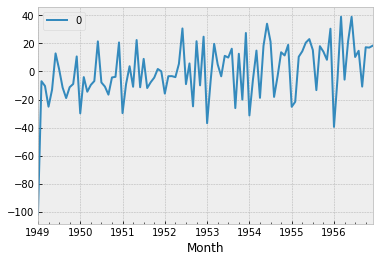

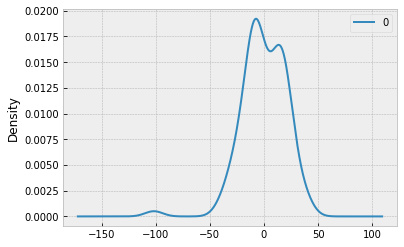

                0
count   96.000000
mean    -0.039708
std     20.428023
min   -101.706608
25%    -10.950895
50%     -3.375037
75%     14.949953
max     38.936846


In [154]:
train(df_train, 0, 13)

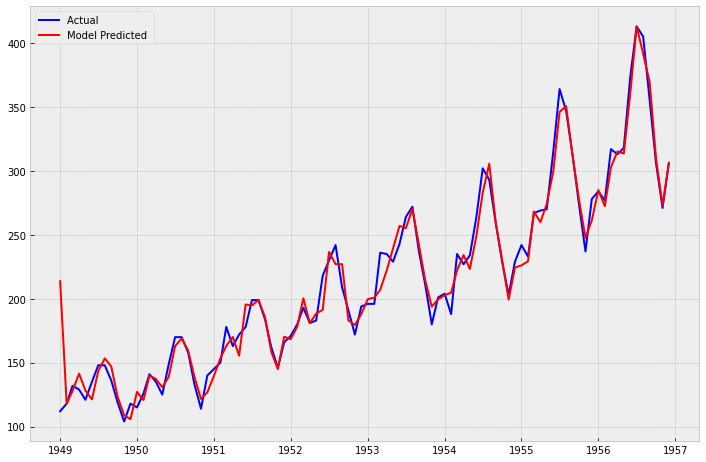

In [155]:

plot(results)

### MA SCORE MAPE 

In [156]:


from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = test["Passengers"]
y_pred = results.predict(start=test.index[0], end=test.index[-1])
# calculate error, again having shifted on s+d steps from the beginning
error = mean_absolute_percentage_error(y_true, y_pred)

print("MAPE Score is ", error)

MAPE Score is  27.374375038290193
